# Analysis of the dataset after the dataprocessing step

What is the model actually getting?

In [31]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

In [1]:
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
ds = datasets.load_from_disk('../data/dataset')['train'].select(range(10000))

In [3]:
ds.set_format('numpy')

In [4]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq', 'taxid', 'query_align_cov', 'subject_align_cov', 'bit_score', 'scaled_local_symmetric_percent_id', 'meso_seq_len', 'thermo_seq_len', 'seq_len_diff', 'meso_temp', 'thermo_temp', 'index', 'cluster', 'status_in_cluster'],
    num_rows: 10000
})

## Plots of length differences

Text(0.5, 1.0, 'Absolute difference in length')

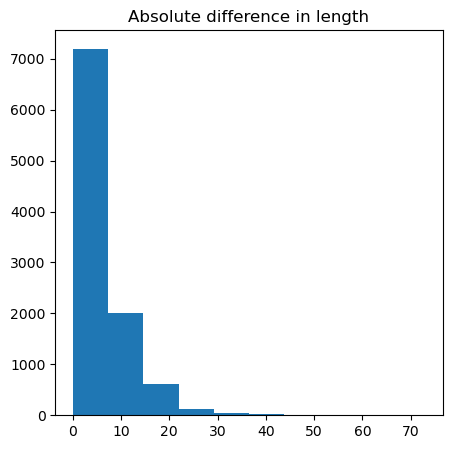

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(ds['seq_len_diff'])
ax.set_title('Absolute difference in length')

Text(0.5, 1.0, 'Normalized absolute difference in length')

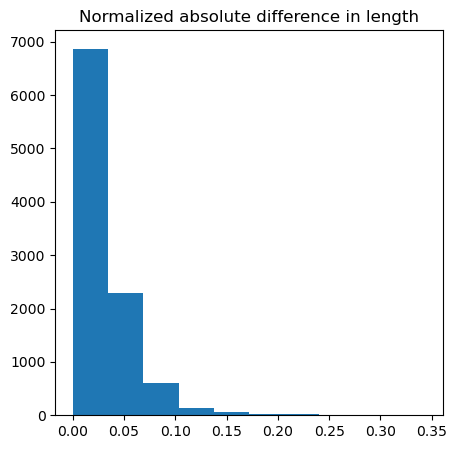

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
norm_len_diff = 2*np.array(ds['seq_len_diff'])/(ds['meso_seq_len']+ds['thermo_seq_len'])
ax.hist(norm_len_diff)
ax.set_title('Normalized absolute difference in length')

Text(0.5, 1.0, 'Normalized difference in length of thermo')

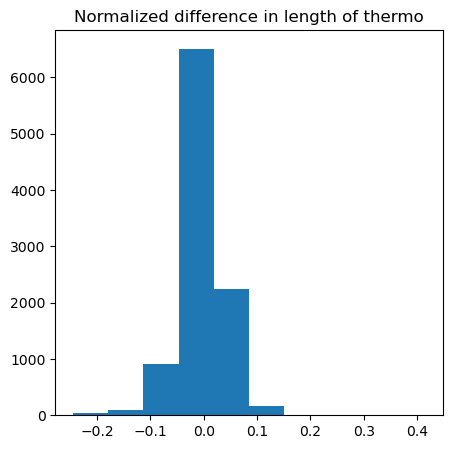

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
thermo_diff = (ds['thermo_seq_len'] - ds['meso_seq_len'])/ds['meso_seq_len']
ax.hist(thermo_diff)
ax.set_title('Normalized difference in length of thermo')

In [19]:
thermo_diff.mean()

-0.0023580521197379945

Thermo is lightly shorter on average

Text(0, 0.5, 'norm length difference')

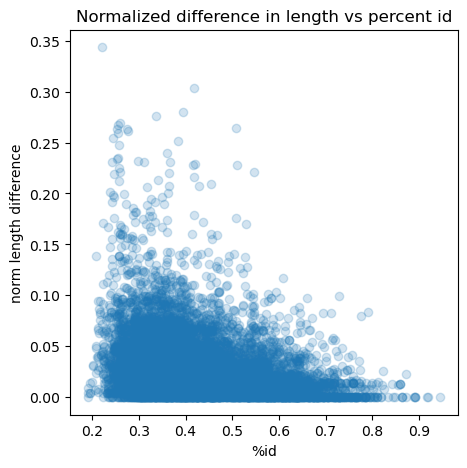

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(ds['scaled_local_symmetric_percent_id'], norm_len_diff, alpha=0.2)
ax.set_title('Normalized difference in length vs percent id')
ax.set_xlabel('%id')
ax.set_ylabel('norm length difference')

## Let's check if energy difference is actually negative for the thermophilic protein

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
sns.set_style('ticks')
sns.set_context('talk')

#### This is how we would normallly load it, if the job had finished, but gpus are taken so use existing replicates (see below)

In [2]:
with open('../data/thermo_gen_estimated.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'meso_0': [-2.7524941059800567, 0.03144246640934073],
 'meso_1': [-2.6442401937554747, 0.024188399087588023],
 'meso_2': [-2.7543676392744385, 0.01583931060826451],
 'meso_3': [-2.7694498171691064, 0.025774511437331452],
 'meso_4': [6.508547961695257, 42.841035669359506],
 'meso_5': [-2.3660305009895866, 0.028380239610320563],
 'meso_6': [-2.5913097045513047, 0.029114792943613892],
 'meso_7': [-2.65194305672786, 0.025109569243376127],
 'meso_8': [-2.3895125511162925, 0.03545319407948843],
 'meso_9': [-0.9275324985121888, 0.07656852683788792],
 'meso_10': [-2.158364195597028, 0.058242852838597516],
 'meso_11': [-2.1704556121745116, 0.0338859036811679],
 'meso_12': [-2.6210575258874207, 0.045228454266206454],
 'meso_13': [-2.5684808829729047, 0.02184460942307761],
 'meso_14': [-2.631354716146034, 0.02601112815666575],
 'meso_15': [-2.692298185092597, 0.03759954680700531],
 'meso_16': [-1.6575186178218153, 0.07717108204086197],
 'meso_17': [-2.1494159856514377, 0.029079097877944847],
 'm

#### make plot

In [4]:
new_data = {}
for k, v in data.items():
    num = int(k.split('_')[-1])
    type_ = k.split('_')[0]
    if num not in new_data:
        new_data[num] = [None, None, None]
    if type_ == 'meso':
        new_data[num][0] = v[0]
    elif type_ == 'thermo':
        new_data[num][1] = v[0]
    else:
        new_data[num][2] = v[0]
    

In [6]:
new_data

{0: [-2.7524941059800567, -2.966290868456487, -2.8663033861186378],
 1: [-2.6442401937554747, -2.6422881468658077, -2.3111222619663727],
 2: [-2.7543676392744385, -2.9204981597399833, -2.9267000526927105],
 3: [-2.7694498171691064, -3.0079660847785283, -2.8590051200625486],
 4: [6.508547961695257, -2.798154280855042, -2.6689314155510013],
 5: [-2.3660305009895866, -2.5036835288436445, -2.277915600318926],
 6: [-2.5913097045513047, -2.614651349210705, -2.6300232792641185],
 7: [-2.65194305672786, -2.734641727323421, -2.8052708890300044],
 8: [-2.3895125511162925, -2.3393684020556393, -2.3628997246875327],
 9: [-0.9275324985121888, -0.9244781465583795, -0.9540170428855798],
 10: [-2.158364195597028, -2.191559198068354, -2.5456432301270344],
 11: [-2.1704556121745116, 1.108644293898177, -2.369862065636134],
 12: [-2.6210575258874207, -2.524823226013671, -2.72140593356871],
 13: [-2.5684808829729047, -2.621345198410253, -2.6339102957242844],
 14: [-2.631354716146034, -2.989596906327095, -2

In [7]:
vals = np.array([v for v in new_data.values()])
vals

array([[-2.75249411, -2.96629087, -2.86630339],
       [-2.64424019, -2.64228815, -2.31112226],
       [-2.75436764, -2.92049816, -2.92670005],
       [-2.76944982, -3.00796608, -2.85900512],
       [ 6.50854796, -2.79815428, -2.66893142],
       [-2.3660305 , -2.50368353, -2.2779156 ],
       [-2.5913097 , -2.61465135, -2.63002328],
       [-2.65194306, -2.73464173, -2.80527089],
       [-2.38951255, -2.3393684 , -2.36289972],
       [-0.9275325 , -0.92447815, -0.95401704],
       [-2.1583642 , -2.1915592 , -2.54564323],
       [-2.17045561,  1.10864429, -2.36986207],
       [-2.62105753, -2.52482323, -2.72140593],
       [-2.56848088, -2.6213452 , -2.6339103 ],
       [-2.63135472, -2.98959691, -2.6339103 ],
       [-2.69229819, -2.74992416, -2.74230648],
       [-1.65751862, -1.75718478, -1.78320779],
       [-2.14941599, -2.31539973, -2.23812832],
       [-2.66068191, -2.72082149, -2.63994623],
       [-2.58015601, -2.84218243, -2.81790562],
       [-2.39232879, -2.65869348, -2.633

In [16]:
true_diff = -1*(vals[:,1] - vals[:,0])
trans_diff = -1*(vals[:,2] - vals[:,0])

In [17]:
kde_data = pd.DataFrame({'True Difference': true_diff, 'Generated Difference': trans_diff}).melt()

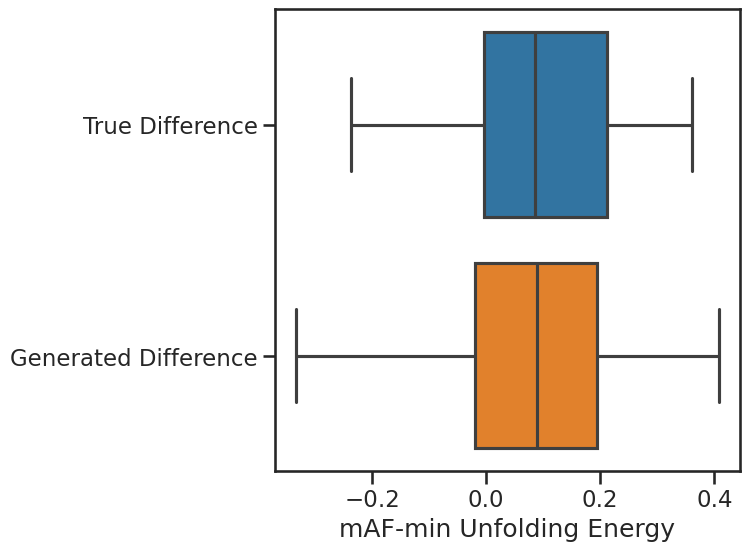

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=kde_data, x='value', y='variable', showfliers=False
        )
ax.set_xlabel('mAF-min Unfolding Energy')
ax.set_ylabel('')
plt.savefig('./figures/estimated_shift_thermo_gen.png', dpi=400, bbox_inches='tight')

In [19]:
stds = [v[1] for v in data.values()]

In [27]:
import scipy.stats

In [37]:
thermo_sigs = 0
for i in range(50):
    p = scipy.stats.ttest_ind_from_stats(
        data[f'meso_{i}'][0],
        data[f'meso_{i}'][1],
        50,
        data[f'thermo_{i}'][0],
        data[f'thermo_{i}'][1],
        50,
        alternative='greater'
    )
    if p[1] < 0.05:
        thermo_sigs += 1

gen_sigs = 0
for i in range(50):
    p = scipy.stats.ttest_ind_from_stats(
        data[f'meso_{i}'][0],
        data[f'meso_{i}'][1],
        50,
        data[f'trans_{i}'][0],
        data[f'trans_{i}'][1],
        50,
        alternative='greater'
    )
    if p[1] < 0.05:
        gen_sigs += 1

In [39]:
thermo_sigs/50

0.66

In [40]:
gen_sigs/50

0.62

## meso vs thermo redundancy

In [7]:
import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')
sns.set_context('talk')

In [4]:
ds = datasets.load_from_disk('../data/dataset/')['train']

In [5]:
ds = ds.remove_columns([c for c in ds.column_names if c not in ['meso_seq', 'thermo_seq']])

In [6]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq'],
    num_rows: 1304897
})

In [8]:
meso_counts = pd.value_counts(ds['meso_seq'])

In [10]:
thermo_counts = pd.value_counts(ds['thermo_seq'])

In [14]:
meso_counts = pd.DataFrame(meso_counts, columns=['N. replicates']).reset_index(drop=True)

In [16]:
thermo_counts = pd.DataFrame(thermo_counts, columns=['N. replicates']).reset_index(drop=True)

In [17]:
meso_counts['Is'] = 'Mesophilic'
thermo_counts['Is'] = 'Thermophilic'
df = pd.concat([meso_counts, thermo_counts])

In [18]:
df

,N. replicates,Is
0,619,Mesophilic
1,411,Mesophilic
2,398,Mesophilic
3,380,Mesophilic
4,354,Mesophilic
...,...,...
19445,1,Thermophilic
19446,1,Thermophilic
19447,1,Thermophilic
19448,1,Thermophilic


In [24]:
df['N. replicates'].describe()

count    365468.000000
mean          7.140964
std          78.816461
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        7930.000000
Name: N. replicates, dtype: float64

In [26]:
df.groupby('Is').describe()

N. replicates                                                    
                     count       mean         std  min  25%  50%   75%     max
Is                                                                            
Mesophilic        346018.0   3.771182    7.248923  1.0  1.0  2.0   4.0   619.0
Thermophilic       19450.0  67.089820  334.663521  1.0  1.0  5.0  28.0  7930.0

<AxesSubplot: xlabel='N. replicates', ylabel='Density'>

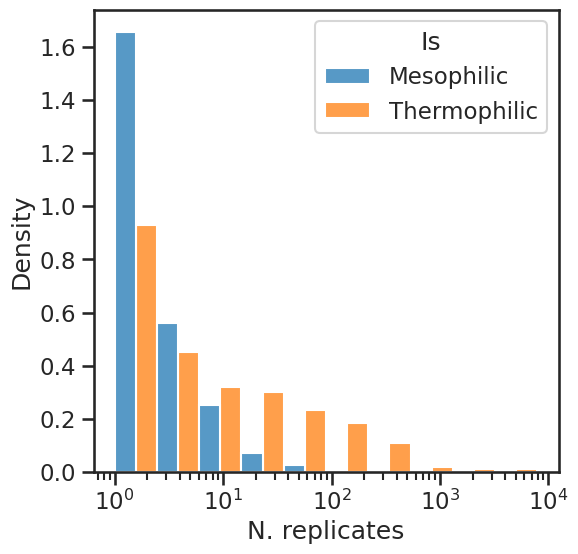

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(data=df, x='N. replicates', hue='Is', ax=ax, log_scale=True, bins=10, cumulative=False, multiple='dodge', stat='density', common_norm=False)
plt.savefig('./figures/data_redundancy.png', dpi=400, bbox_inches='tight')